<font size="7"><h1><center>Segmentation and Clustering of Boroughs in London using Metropolitan Police Service (MPS) Borough Level Crime Data & Foursquare Developer API:</center></h1></font>  

 <font size="5"><h2><center>Feasible Recommendations for Individuals and Businesses</center></h2></font>

# Segmentation and Clustering of Boroughs in London using Metropolitan Police Service (MPS) Borough Level Crime Data & Foursquare Developer API: Feasible Recommendations for Individuals and Businesses  

For this week, you will required to submit the following:  

A description of the problem and a discussion of the background. (15 marks)  
A description of the data and how it will be used to solve the problem. (15 marks)  

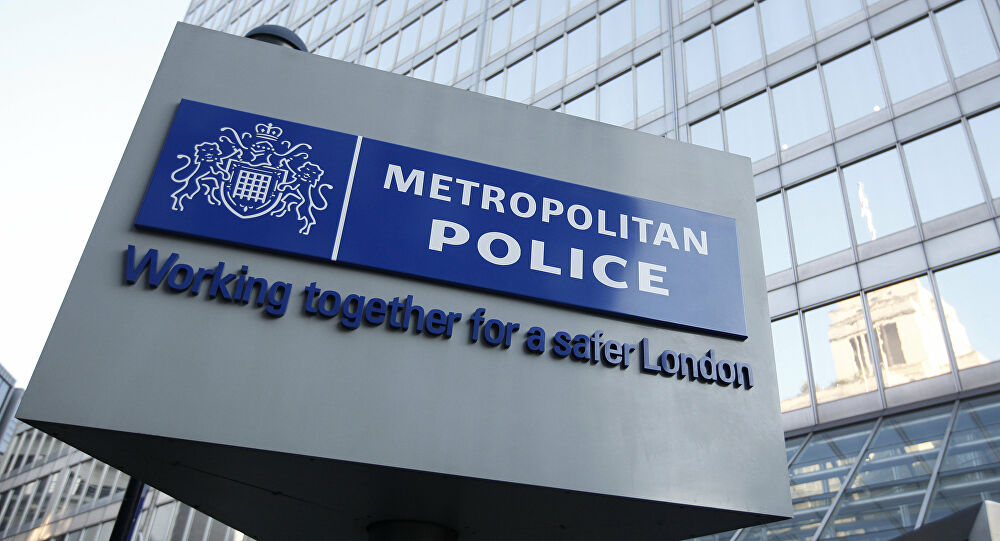

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
display(Image('https://cdn1.img.sputniknews.com/img/106439/10/1064391069_0:0:2952:1597_1000x541_80_0_0_9b7202e1198509b8a18403411e7c5bca.jpg', width=1100, height=800, unconfined=True))


# 1. INTRODUCTION & BUSINESS PROBLEM:  

A family planning to build new home, a potential business owner or contractor looking to setup their office, an international student looking for affordable housing facilities or a traveller interested in exploring the city - all have a pivotal factor in common to be taken into consideration (irrespective of the budget/affordability) before they make a decision: 'SAFETY'.  

In this project, we will study in detail the segmenting, clustering and classification of London Boroughs using [Metropolitan Police Service](https://www.met.police.uk/) data and [Foursquare Developer](https://developer.foursquare.com/) API. As the city grows and develops, it becomes increasingly important to examine and understand it quantitiatively. The MPS provides open data for Developers, Investors, Policy Makers, City Planners who possess an interest in answering the following questions for development and safety of residents:  

- What neighbourhoods have the highest crime?  
- Is population density correlated to crime level?  
- Using Foursquare data, what venues are most common in different locations within the city?  
- Does [London Datastore](https://data.london.gov.uk/) provide with specific enough or thick enough data to empower decisions to be made? Or is it too aggregate to provide value in its current detail? Let's find out.  

# 2. TARGET AUDIENCE:  
1. **Professionals relocating to London for work** - The number of workers in London is projected to increase by 582,000 (up 10%) in the next 10 years. This is the equivalent to about 58,200 more jobs each year. Apprenticeship starts in London more than doubled between 2009/10 and 2010/11 and since then have maintained a fairly steady level.  
2. **International Students & Overseas Nationals** - There were over 5 million international visitors to London in 2019 Q2, up 2.3% from the same quarter a year before. In 2018/19, there were over 240,000 new National Insurance Number (NINo) registrations from overseas nationals in London, which was 2% higher than the year before.  
3. **Small Businesses** - With a potential opportunity to establish their footprint, small businesses benefit from the spending by local communities, travellers and visitors. Total spend by international visitors alone in London was at £12.1bn in 2018 down 10.2% on 2017. Spending in the most recent quarter (2019 Q1) was 1.8%, 6.0% higher compared with the same quarter a year previous.  
4. **Policy Makers** - By grouping the neighbourhoods into most similar groups, the GLA and Mayors Office for Policing and Crime (MOPAC) have enabled both the police and the public to understand performance compared to similar neighbourhoods in London.  
5. **Law Enforcement** - Police and partners now share best practice with like-for-like neighbourhoods. The Metropolitan Police Service actively utilises the [Neighbourhood Confidence and Crime Comparator](https://maps.london.gov.uk/NCC/) at neighbourhood level to identify similar areas where public confidence metrics vary the most, and respond to the challenge of MOPAC to reduce these gaps.  
6. **Families and Communities** - The population of London in 2017 was 8,904,000 up 7% from five years ago. The population is projected to increase to 9.7 million by 2025 (an increase of 17% from the 2011 Census) and reach 10 million by 2030.  
7. **Housing** - In 2019/20 the total number of GLA funded affordable housing starts in London was 12,546 accounting for 90.6% of total London housing starts. In 2018/19 London’s dwelling stock saw a net increase of 35,959 dwellings compared to the year before.  
8. **Voluntary Crime Prevention Movements** - Ex: [Neighborhood Watch](https://www.ourwatch.org.uk/)  


# 3. DATA & DATA SOURCES:  

### 3.1. MPS Borough Level Crime Data:  

[MPS Borough Level Crime Data](https://data.london.gov.uk/dataset/recorded_crime_summary) counts the number of crimes in London at the borough-level per month, based on the crime type. 

The data is available in two files for each level of geography - the most up to date data covering the last available 24 months only and one covering all historic full calendar years. To analyze the most recent patterns, I opted to explore the one with the last available 24 months.

In March 2019, the Metropolitan Police Service started to provide offences grouped by the updated [Home Office crime classifications](https://www.gov.uk/government/publications/counting-rules-for-recorded-crime). This currently only covers the most recent 24 months of data.

Below is a list of the crime types covered under the new HO categories:

**Major Category - Minor Category:**  

- Arson and Criminal Damage - Arson / Criminal Damage  

- Burglary: Burglary - Business and Community / Burglary - Residential**  

- Drug Offences: Drug Trafficking / Possession of Drugs  

- Miscellaneous Crimes Against Society: Absconding from Lawful Custody / Bail Offences / Bigamy / Concealing an Infant Death Close to Birth / Dangerous Driving / Disclosure, Obstruction, False or Misleading State / Exploitation of Prostitution / Forgery or Use of Drug Prescription / Fraud or Forgery Associated with Driver Records / Going Equipped for Stealing / Handling Stolen Goods / Making, Supplying or Possessing Articles for use i / Obscene Publications / Offender Management Act / Other Forgery / Other Notifiable Offences / Perjury / Perverting Course of Justice / Possession of False Documents / Profitting From or Concealing Proceeds of Crime / Soliciting for Prostitution / Threat or Possession With Intent to Commit Crimina / Wildlife Crime  

- Possession of Weapons: Other Firearm Offences / Possession of Firearm with Intent / Possession of Firearms Offences / Possession of Other Weapon / Possession of Article with Blade or Point  

- Public Order Offences: Other Offences Against the State, or Public Order / Public Fear Alarm or Distress / Racially or Religiously Aggravated Public Fear / Violent Disorder  

- Robbery: Robbery of Business Property / Robbery of Personal Property  

- Sexual Offences*: Other Sexual Offences / Rape  

- Theft: Bicycle Theft / Other Theft / Shoplifting / Theft from Person  

- Vehicle Offences: Aggravated Vehicle Taking / Interfering with a Motor Vehicle / Theft from a Motor Vehicle / Theft or Taking of a Motor Vehicle  

- Violence Against the Person: Homicide / Violence with Injury / Violence without Injury  

 
To note:  

Fraud data was transferred from individual police forces to National Action Fraud in March 2013  

 **Prior to April 2017, police recorded burglary offence categories were split such that dwellings (domestic burglary) and buildings other than dwellings (non-domestic burglary) were separately identifiable, where:  

- domestic burglary covers residential premises, including attached buildings such as garages  
- non-domestic burglary covers non-residential premises, including businesses and public buildings, as well as non-attached buildings within the grounds of a dwelling, such as sheds and detached garages
From April 2017 onwards a new classification of police recorded burglary was introduced, dividing offences into two categories of “residential” and “business and community”  

“Residential” burglary includes all buildings or parts of buildings that are within the boundary of, or form a part of, a dwelling and includes the dwelling itself, vacant dwellings, sheds, garages, outhouses, summer houses and any other structure that meets the definition of a building. It also includes other premises used for residential purposes such as houseboats, residential care homes and hostels.  

“Business and community” burglary includes all buildings or parts of buildings that are used solely and exclusively for business purposes or are otherwise entirely outside the classification of residential burglary.  
### 3.2. List of London boroughs:  
The motive behind using this dataset is to fill the gap that our actual crime dataset lacks to address i.e., extract the key attributes or columns from the [List of London boroughs](https://en.wikipedia.org/wiki/List_of_London_boroughs) dataset will help us extract and analyze the attributes including Population Density for each of the 32 boroughs and their respective Co-ordinates.  

### 3.3. Foursquare Location Data:  
The [Foursquare Venues & Places Database](https://developer.foursquare.com/docs/api/venues/details) gives the full details about a venue including location, tips, and categories. We can access precise, up-to-date community-sourced venue data. Its large selection of rich and firmographic location data unlocks the potential to enhance our app or website with the ability to describe locations, analyze trends, and improve user experience.  

If the venue ID given is one that has been merged into another venue, the response will show data about the other venue instead of giving you an error. User authenticated calls will also receive information about who is here now. This is a Premium endpoint with access to venue's photos, tips, hours, menu, categories, recommendations, events, stats, etc.  

Using these 3 major datasets as the basis for our project, let's start leveraging its features and attributes to address our business problem.  

*Note: The further sections of the project to be included in [**The Battle of Neighborhoods (Week 2)**](https://github.com/SandeepAswathnarayana/mooc/blob/master/coursera/IBM%20Data%20Science%20Professional%20Certificate/Applied%20Data%20Science%20Capstone/Final%20Capstone%20Project/The_Battle_of_Neighborhoods_(Week_2).ipynb) segment.*  